In the following task, I made a pipeline that inputs two images and produce a hybrid image or hybrid visual illusion by combining low-frequency and high-frequncy components from the images. This image when viewed from different distances, can be appeared as one of those original images.
Low-frequency components contains attributes such as overall shapes, contours, and global structures, which are perceived more readily when viewed from a distance. In contrast, high-frequency components, including fine details, textures, and local features, become more distinguishable when viewed up close.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

For full-filling the task, we need to calculate the 2D Fourier transform of two images by transfering images from spatial domain to frequency domain. Then a shift to the Fourier coefficients is necessary. it will shift the zero-frequency component of the Fourier coefficients to the center of the array, where low-frequency components are located in the center, and the high-frequency components are at the edges. we need to apply these before apply low-pass and high-pass filters since this way is consistent with our intuitive understanding of spatial frequency.

In [ ]:
# Read the input images
image1 = cv2.imread('img1.jpg', 0)
image2 = cv2.imread('img2.jpg', 0)
print(image1.shape, image2.shape)

# Perform FFT on both images
fft_image1 = np.fft.fftshift(np.fft.fft2(image1))
fft_image2 = np.fft.fftshift(np.fft.fft2(image2))

(256, 256) (256, 256)


To create a hybrid image, a low-pass filter is applied to one image to retain the low-frequency components, while a high-pass filter is applied to another image to extract the high-frequency components. The low-frequency image is then combined with the high-frequency image, resulting in a hybrid image that exhibits different interpretations based on viewing distance.
To full-fill this objective following steps are performed:
- `cutoff_frequency` is set to a parameter that determines the size of the frequency region to be filtered.
- Apply a high-pass filter to image1.
- Apply a low-pass filter to image2.
- Combine the filtered images in the frequency domain.
- Perform an inverse FFT (IFFT) to obtain the hybrid image. this process convert the resulted image from the frequency domain to the spatial domain. The absolute value operation ensures that the resulting array contains only the magnitude information of the hybrid image. It discards the phase information, as the human visual system is more sensitive to changes in magnitude than phase.



In [ ]:
# Apply high pass filter on image1
cutoff_frequency = 20
rows, cols = image1.shape
center_row, center_col = int(rows/2), int(cols/2)
mask = np.ones((rows, cols))
mask[center_row-cutoff_frequency:center_row+cutoff_frequency,
     center_col-cutoff_frequency:center_col+cutoff_frequency] = 0
fft_image1_highpass = fft_image1 * mask

# Apply low pass filter on image2
cutoff_frequency = 20
mask = np.zeros((rows, cols))
mask[center_row-cutoff_frequency:center_row+cutoff_frequency,
     center_col-cutoff_frequency:center_col+cutoff_frequency] = 1
fft_image2_lowpass = fft_image2 * mask

# Combine the filtered images in frequency domains
hybrid_fft = fft_image1_highpass + fft_image2_lowpass

# Perform inverse FFT to obtain the hybrid image in spatial domain
hybrid_image = np.abs(np.fft.ifft2(hybrid_fft))

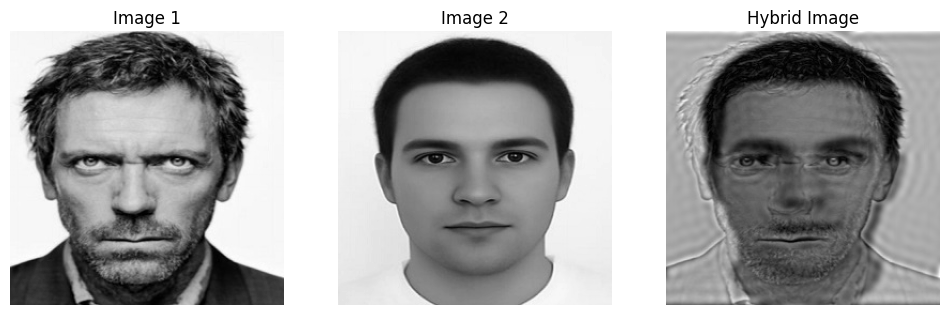

In [ ]:
# Display the hybrid image and both original images
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Image 1')
plt.imshow(image1, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Image 2')
plt.imshow(image2, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Hybrid Image')
plt.imshow(hybrid_image, cmap='gray')
plt.axis('off')

plt.show()

As it can be seen from the plot, hybrid image successfuly represent both images and combined the high-pass filtered image of image 1 and low-pass filtered image of image 2.